In [102]:
#Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [103]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [104]:
#Get the file
downloaded = drive.CreateFile({'id':'1Li2EvUUT17OKJMe3kBcRVRLruyMSbkrB'}) 
downloaded.GetContentFile('deliveries.csv') 

downloaded1 = drive.CreateFile({'id':'1QM2NnxjDchL7bF5qdzoY6-FFYJleocXw'}) 
downloaded1.GetContentFile('matches.csv') 

In [105]:
import pandas as pd
import numpy as np


In [106]:
delivery = pd.read_csv('deliveries.csv') 
delivery.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [107]:
matches = pd.read_csv('matches.csv') 
matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [108]:
#checking number of null value in umpire3 column
matches['umpire3'].isnull().sum()

636

In [109]:
#drop column umpire3 since all values are NaN
matches.drop(['umpire3'], axis=1, inplace=True)

#filling all NaN values with 0
delivery.fillna(0,inplace=True) 

In [110]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [111]:
#change all teams name by their abbreviations
matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
                ['SRH', 'MI', 'GL', 'RPS', 'RCB', 'KKR', 'DD', 'KXIP', 'CSK', 'RR', 'DC', 'KTK', 'PW', 'RPS'], inplace=True)

delivery.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
                ['SRH', 'MI', 'GL', 'RPS', 'RCB', 'KKR', 'DD', 'KXIP', 'CSK', 'RR', 'DC', 'KTK', 'PW', 'RPS'], inplace=True)

In [112]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

In [113]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah'])

In [125]:
from geopy.extra.rate_limiter import RateLimiter

# conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# create location column
matches['location'] = matches['city'].apply(geocode)

# create longitude, laatitude and altitude from location column (returns tuple)
matches['point'] = matches['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# split point column into latitude, longitude and altitude columns
matches[['latitude', 'longitude', 'altitude']] = pd.DataFrame(matches['point'].tolist(), index=matches.index)


In [126]:
matches.drop(['location','point'], axis=1, inplace=True)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,latitude,longitude,altitude
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,17.388786,78.461065,0.0
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,18.521428,73.854454,0.0
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,22.305199,70.802834,0.0
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,22.720362,75.868200,0.0
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,12.979120,77.591300,0.0


In [142]:
print('highest number of matches wins: ', ((matches['winner']).value_counts()).idxmax())
print('most man of the match awards:  ', ((matches['player_of_match']).value_counts()).idxmax())

highest number of matches wins:  MI
most man of the match awards:   CH Gayle


### **Toss decision**
 

In [115]:
print('decision after win the toss in %\n',((matches['toss_decision'].value_counts())*100)/636) 

decision after win the toss in %
 field    57.075472
bat      42.924528
Name: toss_decision, dtype: float64


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use( 'ggplot')

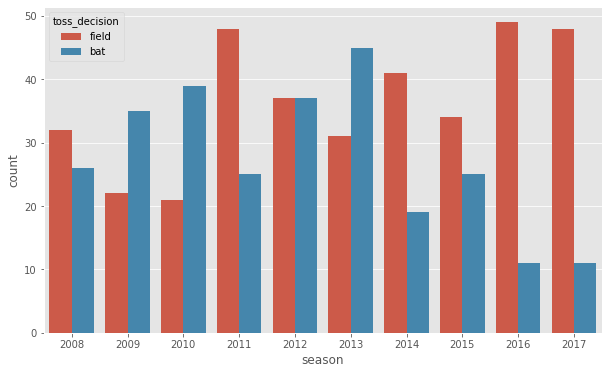

In [117]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.show()

### **Average runs per match across season**

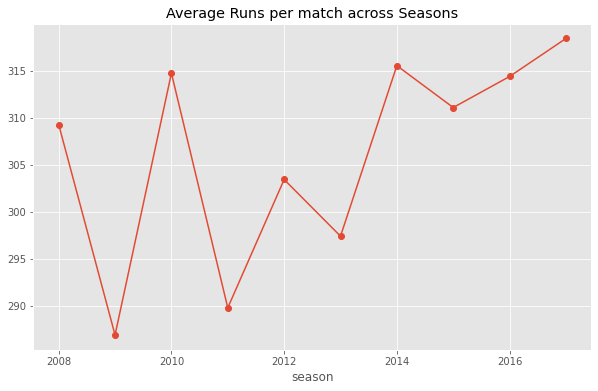

In [118]:
# merging the matches and delivery dataframe by referencing the id and match_id columns respectively
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

# get total runs for each season
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()

# get average runs per match
avgruns_each_season = matches.groupby(['season']).count().id.reset_index() #
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs'] = season['total_runs']
avgruns_each_season['average_runs_per_match'] = avgruns_each_season['total_runs']/avgruns_each_season['matches']

avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match across Seasons')
plt.show()

### **Top batsman**

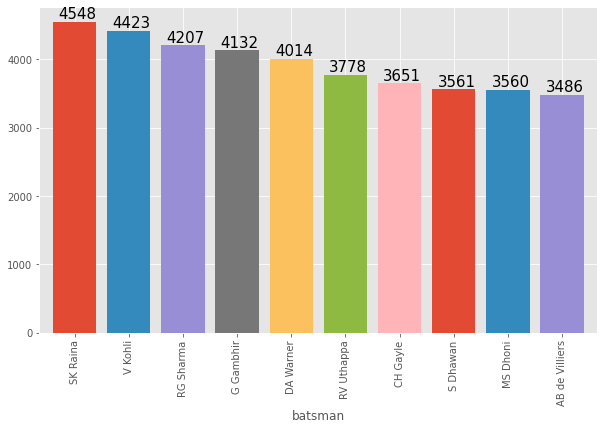

In [119]:
plt.subplots(figsize=(10,6))
max_runs = delivery.groupby(['batsman'])['batsman_runs'].sum()
ax = max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette())
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

### **Top bowler**

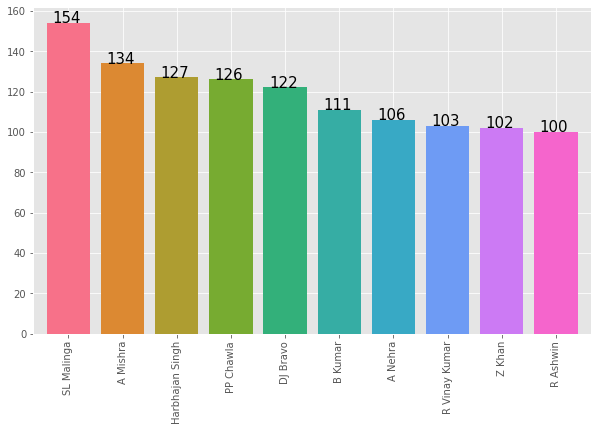

In [120]:
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct = delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax = ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette("husl",10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
plt.show()

### **Score distribution for teams by innings**

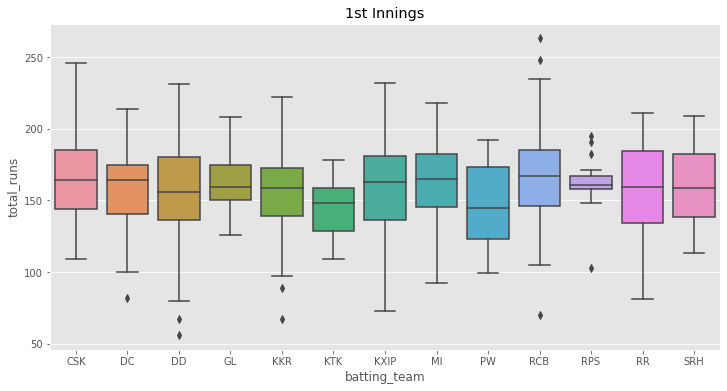

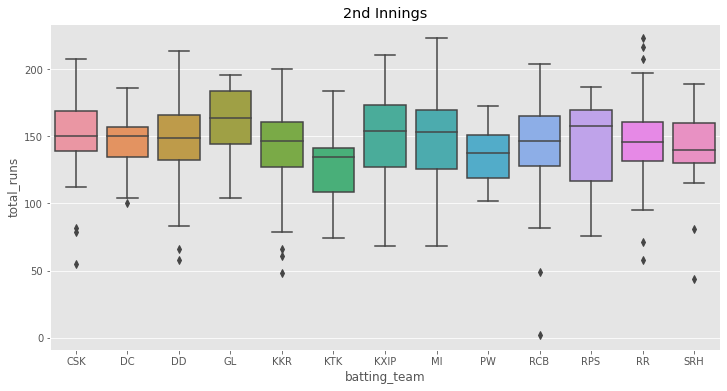

In [122]:
plt.subplots(figsize=(12,6))
xyz = delivery.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz = xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning = xyz[xyz['inning']==1]
score_2_inning = xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
plt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig = plt.gcf()
fig.set_size_inches(12,6)

### **Match venue on map**

In [127]:
import folium

In [128]:
# India latitude and longitude values
X = 20.5937
Y = 78.9629

In [135]:
# create map 
stad_map = folium.Map(location=[X, Y], zoom_start=5, tiles ='Stamen Terrain')


In [141]:
# instantiate a feature group for the city in the dataframe
stadium = folium.map.FeatureGroup()

# loop through the city and add each to the incidents feature group
for lat, lng, label in zip(matches.latitude, matches.longitude, matches.venue):
  folium.CircleMarker(
        [lat, lng],
        radius=6, # define how big you want the circle markers to be
        color='blue',
        fill=True,
        popup=label,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(stad_map)

# show map
stad_map

Output hidden; open in https://colab.research.google.com to view.

### **Finals**

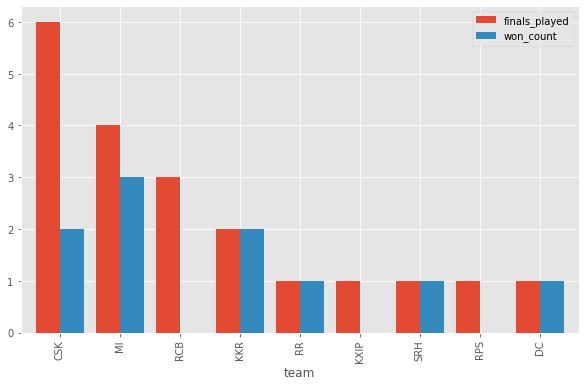

In [123]:
finals = matches.drop_duplicates(subset=['season'],keep='last')
finals = finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals = pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz = finals['winner'].value_counts().reset_index()
most_finals = most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals = most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
plt.gcf().set_size_inches(10,6)
plt.show()

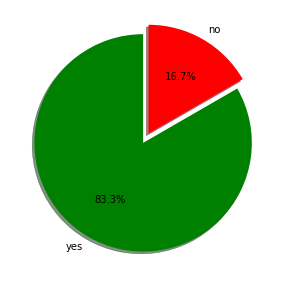

In [124]:
df = finals[finals['toss_winner']==finals['winner']]
slices = [len(finals),(9-len(df))]
labels = ['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,colors=['G','R'],explode=(0,0.1),autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()